# Practica 7 - Serie discreta de Fourier

**Author:** Cristian David Araujo A.

**ID:** 1089568350

**Date:** 16/10/2024

## Transformada Rápida de Fourier para señales discretas

### 1. Genere la siguiente señal de acuerdo con el último número de su cédula (C).

|sin(2π ∗ (C + 5) ∗ 10 ∗ t)|

La frecuencia de muestreo debe ser al menos 20 veces mayor que la frecuencia de su señal.


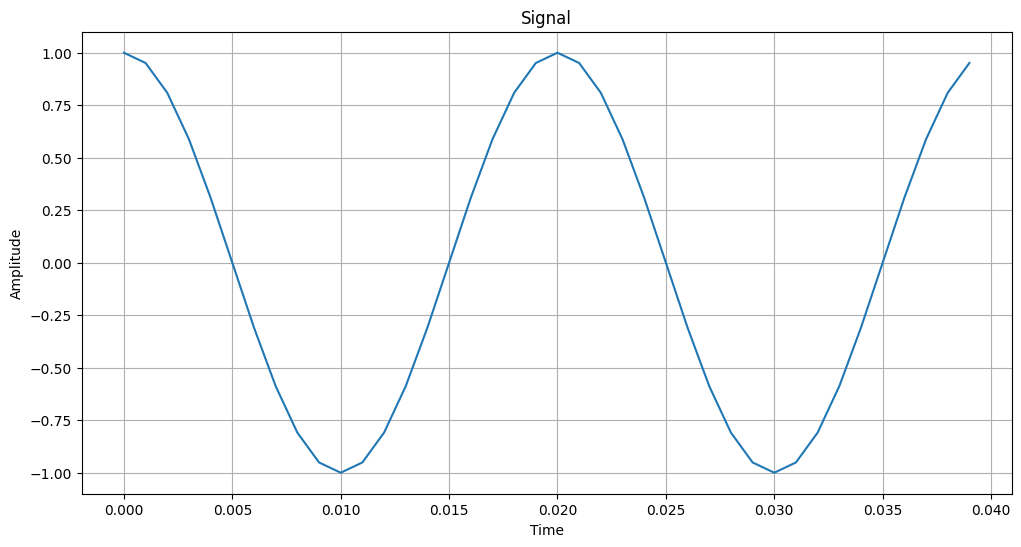

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def dftmatrix(N, Nfft):
    #construct DFT matrix
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None]))
    return U/np.sqrt(Nfft)

#Constants for frequency and sampling rate
C = 0
f_signal = (C + 5)*10
f_sampling = 20*f_signal

#Time vector for 2 period of the signal
t = np.arange(0, 2/f_signal, 1/f_sampling)
x = np.cos(2*np.pi*f_signal*t)

#Graph of the signal
plt.figure(figsize=(12, 6))
plt.plot(t, x)
plt.title('Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


### 2. Calcule la matriz de transformación U y grafique la transformada de Fourier de la señal asignada para al menos 4 distintos valores de NFFT (grafique los resultados usando subplots). ¿Qué se puede concluir al respecto?


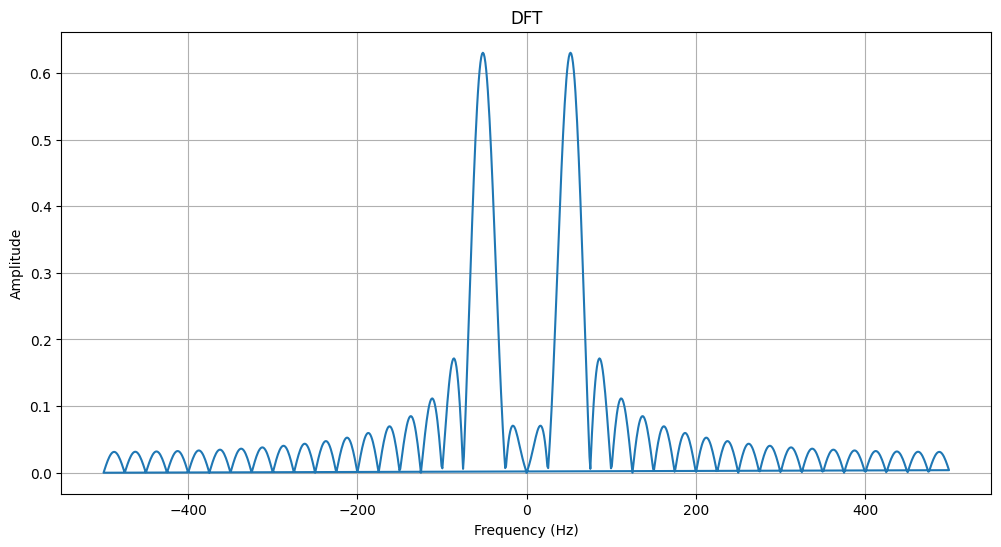

In [116]:
### 2. Calcule la matriz de transformación U y grafique la transformada de Fourier de la señal asignada para al menos 4 distintos valores de NFFT (grafique los resultados usando subplots). ¿Qué se puede concluir al respecto?

#Number of samples for the DFT
nfft = 2**(10)

#Convert the vector x to column vector
x_column = x[:, None]

#Calculate the DFT matrix
N = len(x) #Number of samples of the signal
U = dftmatrix(N, nfft)

#Calculate the DFT of the signal
X = U.H * x_column[:]

#Frequency vector
f = np.hstack((np.arange(0, nfft//2), np.arange(-nfft//2, 0)))*f_sampling/nfft

#Graph of the DFT
plt.figure(figsize=(12, 6))
plt.plot(f, np.abs(X))
plt.title('DFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


### 3. Use la siguiente instrucción para calcular la transformada inversa en cada uno de los casos del ítem anterior.
inversa=np.fft.ifft(signal) #signal: Frequency-domain signal

In [123]:
### 3. Use la siguiente instrucci´on para calcular la transformada inversa en cada uno de los casos del ´ıtem anterior. inversa=np.fft.ifft(signal) #signal: Frequency-domain signal

#Calculate the inverse DFT
inverse = np.fft.ifft(X).real
inverse_2 = np.dot(U, X).real

#Calculate the time vector for the inverse signal
t_inverse = np.linspace(0, (N - 1) / f_sampling, N)

### 4. Grafique los resultados usando subplots y comparelos. ¿Puede observar alguna diferencia?, ¿a que se debe esto? Escriba sus conclusiones.

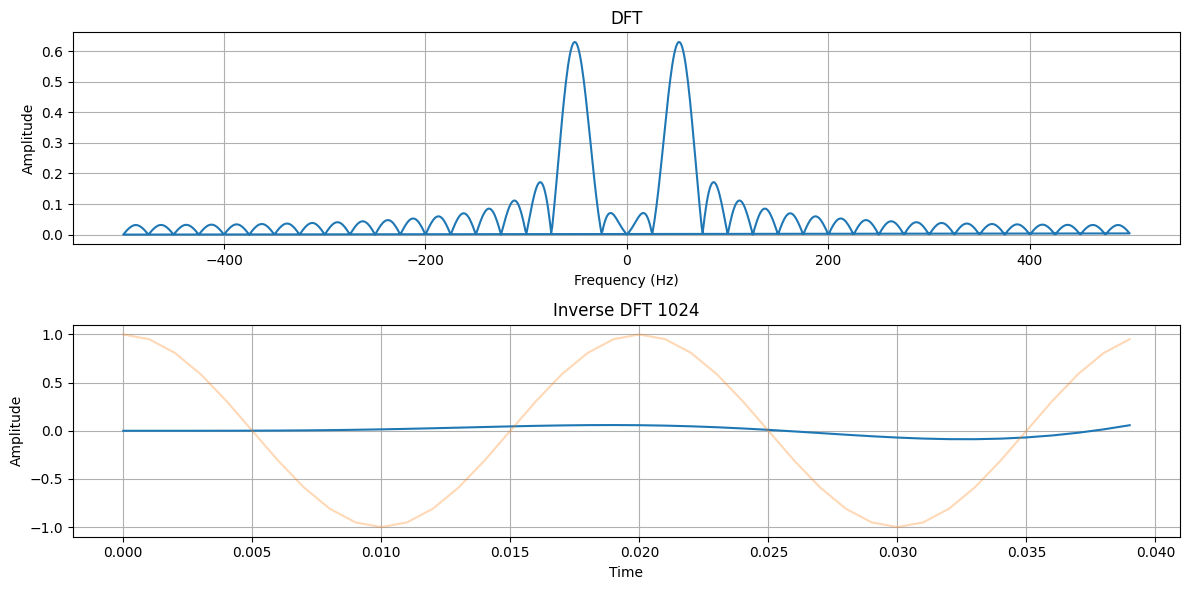

In [125]:
### 4. Grafique los resultados usando subplots y comparelos. ¿Puede observar alguna diferencia?, ¿a que se debe esto? Escriba sus conclusiones.

#Graph of the signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(f, np.abs(X))
plt.title('DFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t_inverse, inverse[:len(t_inverse)].real, label='Inverse DFT', alpha=1)
plt.plot(t, x, label='Original signal', alpha=0.3)
plt.title('Inverse DFT {}'.format(nfft))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.show()

## Modulación PSK

### 1. Codifique los dos últimos dígitos de su cédula en binario (4 bits por dígito), y arme una trama de bits para ser transmitida.


In [ ]:
### 1. Codifique los dos últimos dígitos de su cédula en binario (4 bits por dígito), y arme una trama de bits para ser transmitida.
